<a href="https://colab.research.google.com/github/0xfffddd/Coding/blob/main/dnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dense Deep Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a dense neural network to predict the class of digit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

## The MNIST dataset - Preprocessing

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it.

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).

    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).

    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.

    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
      from 0 to 255.

    

In [3]:
# the data, shuffled and split between train and test sets
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Reshape and normalize the features

In [4]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim)
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot encoding

In [5]:
y_train_pre[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [7]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (50000, 784)
50000 train samples, 10000 validation samples, 10000 test samples


# Multi-class Classification model

## Multi-output Perceptron -- No hidden layer

Build a 784-input 10-output perceptron, with no hidden layer for multi-class classification. This model is also known as the [multinomial logistic regression model](https://en.wikipedia.org/wiki/Multinomial_logistic_regression).

### Build the model

In [8]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [10]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7383 - loss: 1.0321 - val_accuracy: 0.8916 - val_loss: 0.3884
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.3556 - val_accuracy: 0.9071 - val_loss: 0.3373
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9127 - loss: 0.3128 - val_accuracy: 0.9129 - val_loss: 0.3178
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9180 - loss: 0.2943 - val_accuracy: 0.9138 - val_loss: 0.3099
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9207 - loss: 0.2863 - val_accuracy: 0.9151 - val_loss: 0.3041
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9222 - loss: 0.2787 - val_accuracy: 0.9169 - val_loss: 0.3003
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9243 - loss: 0.2733 - val_accuracy: 0.9174 - val_loss: 0.2978
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.2683 - val_accuracy: 0.

Plot historical training and validation losses

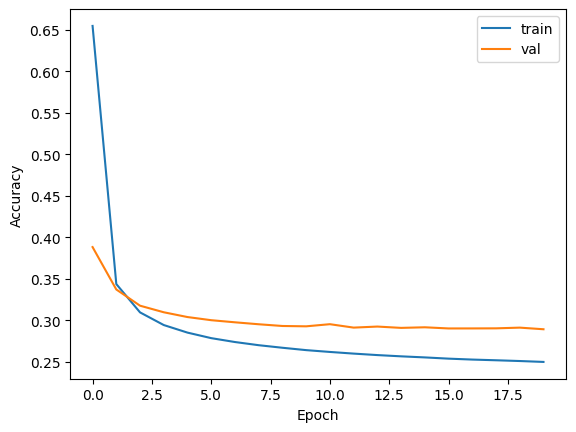

In [11]:
def plot_history_loss(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['loss'], label="train")
    plt.plot(hist['epoch'], hist['val_loss'], label="val")
    plt.legend()
    plt.show()

plot_history_loss(history)

Plot historical training and validation accuracy

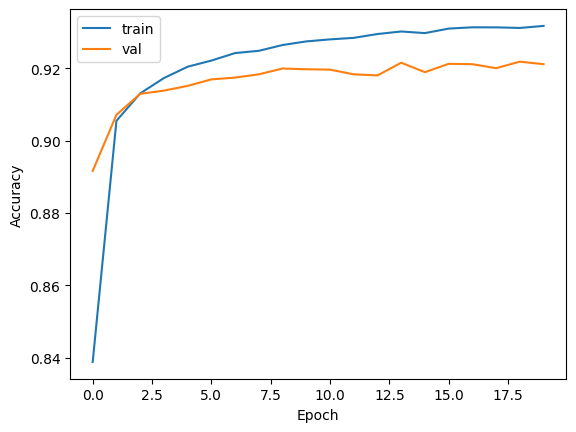

In [12]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Evaluate the model

In [13]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 92.72%


## Two-layer fully-connected NN

### Build the model

In [14]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,402 (1.66 MB)

 Trainable params: 435,402 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8465 - loss: 0.5021 - val_accuracy: 0.9526 - val_loss: 0.1534
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9639 - loss: 0.1184 - val_accuracy: 0.9689 - val_loss: 0.1008
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9792 - loss: 0.0699 - val_accuracy: 0.9742 - val_loss: 0.0885
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9848 - loss: 0.0490 - val_accuracy: 0.9765 - val_loss: 0.0754
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9744 - val_loss: 0.0815
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9700 - val_loss: 0.1076
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9731 - val_loss: 0.1034
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9946 - loss: 0.0144 - val_accuracy: 0

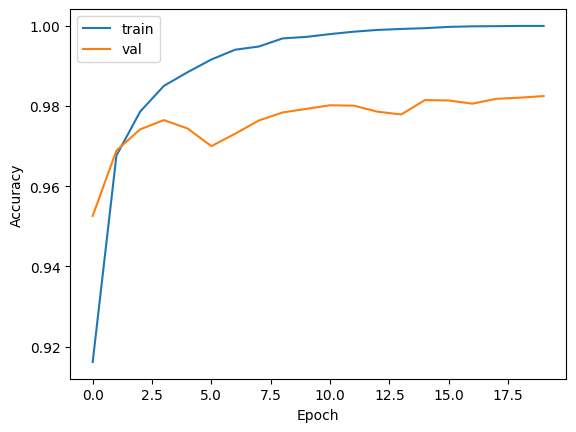

In [17]:
plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [18]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.32%


Make predictions for testing data

In [19]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, 0, 4])

Visualize predictions

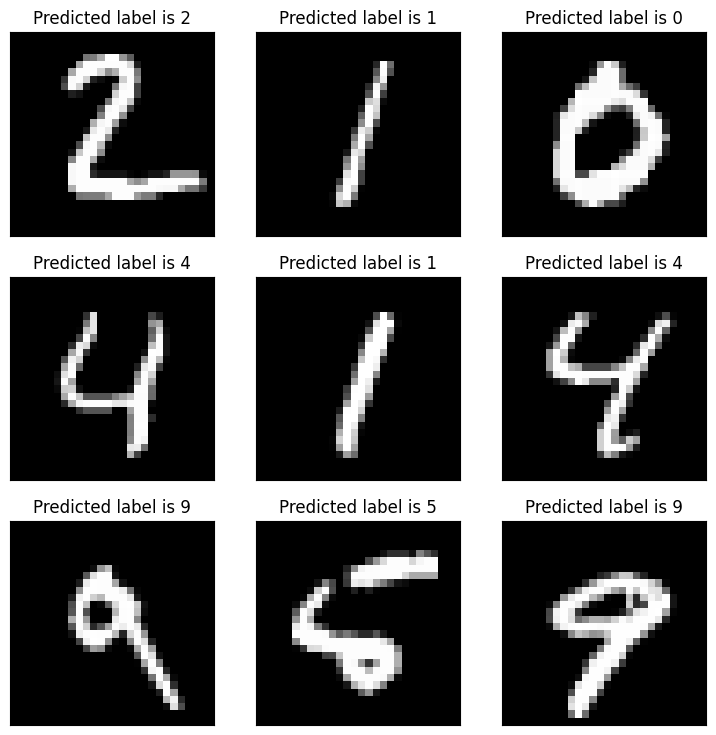

In [20]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## Early Stopping

### Build a new model

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

### Train the model with early stopping

https://keras.io/api/callbacks/early_stopping/

patience: Number of epochs with no improvement after which training will be stopped. Defaults to 0.

In [22]:
EPOCHS = 20

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8475 - loss: 0.4969 - val_accuracy: 0.9575 - val_loss: 0.1476
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9665 - loss: 0.1089 - val_accuracy: 0.9714 - val_loss: 0.0969
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9788 - loss: 0.0683 - val_accuracy: 0.9759 - val_loss: 0.0845
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9765 - val_loss: 0.0801
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9893 - loss: 0.0326 - val_accuracy: 0.9761 - val_loss: 0.0816
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9933 - loss: 0.0234 - val_accuracy: 0.9735 - val_loss: 0.0912


### Evaluate the model

In [24]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 97.11%


# Binary Classification

How to write the code for a binary classification problem?

## Data Preprocessing

Consider predicting whether a handwritten digit is '8' or not.

In [25]:
y_train_8=y_train[:,8]
y_test_8=y_test[:,8]
y_val_8=y_val[:,8]

Generated labels are binary: 0 if the digit is not '8', 1 if the digit is '8'.

In [26]:
y_train_8

array([0., 0., 1., ..., 0., 0., 0.])

Build a binary classification model. Difference

1. Output dimension for the final layer is 1
2. Activation function for the final layer is 'sigmoid'
3. Loss function is 'binary_crossentropy'



## Build the model

In [27]:
model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,817 (1.66 MB)

 Trainable params: 434,817 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

## Train the model

Train the model on the binary labels.

In [29]:
EPOCHS = 10

history = model.fit(X_train, y_train_8,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val_8))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9546 - loss: 0.1295 - val_accuracy: 0.9904 - val_loss: 0.0308
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9903 - loss: 0.0306 - val_accuracy: 0.9928 - val_loss: 0.0238
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9927 - loss: 0.0203 - val_accuracy: 0.9894 - val_loss: 0.0368
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9948 - loss: 0.0150 - val_accuracy: 0.9940 - val_loss: 0.0246
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9943 - val_loss: 0.0189
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9972 - loss: 0.0076 - val_accuracy: 0.9939 - val_loss: 0.0240
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9976 - loss: 0.0065 - val_accuracy: 0.9952 - val_loss: 0.0226
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9987 - loss: 0.0038 - val_accuracy:

## Evaluate the model

The binary classification task is easier than the 10-class one. It is expected we see a better performance.

In [30]:
_, acc = model.evaluate(X_test, y_test_8, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 99.55%
